In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import multivariate_normal

# Their to_rad is wrong
P1_dist_angle = [32.3, 5.1235]
P2_dist_angle = [146.8, 3.6310]
E_p1 = [30.344572744546294, 2.8533795973322875]
E_p2 = [113.5817863518005, -2.228022980401615]

p1_draws_df = pd.read_csv('p1_draws.csv')
p2_draws_df = pd.read_csv('p2_draws.csv')

In [4]:
p1_mean = p1_draws_df[['mu_dist', 'mu_angle']].values
p1_covariance = p1_draws_df[['sigma11', 'sigma12', 'sigma21', 'sigma22']].values.reshape(-1, 2, 2)
p2_mean = p2_draws_df[['mu_dist', 'mu_angle']].values
p2_covariance = p2_draws_df[['sigma11', 'sigma12', 'sigma21', 'sigma22']].values.reshape(-1, 2, 2)

In [5]:
p1_points = pd.read_csv('p1.csv')
p2_points = pd.read_csv('p2.csv')

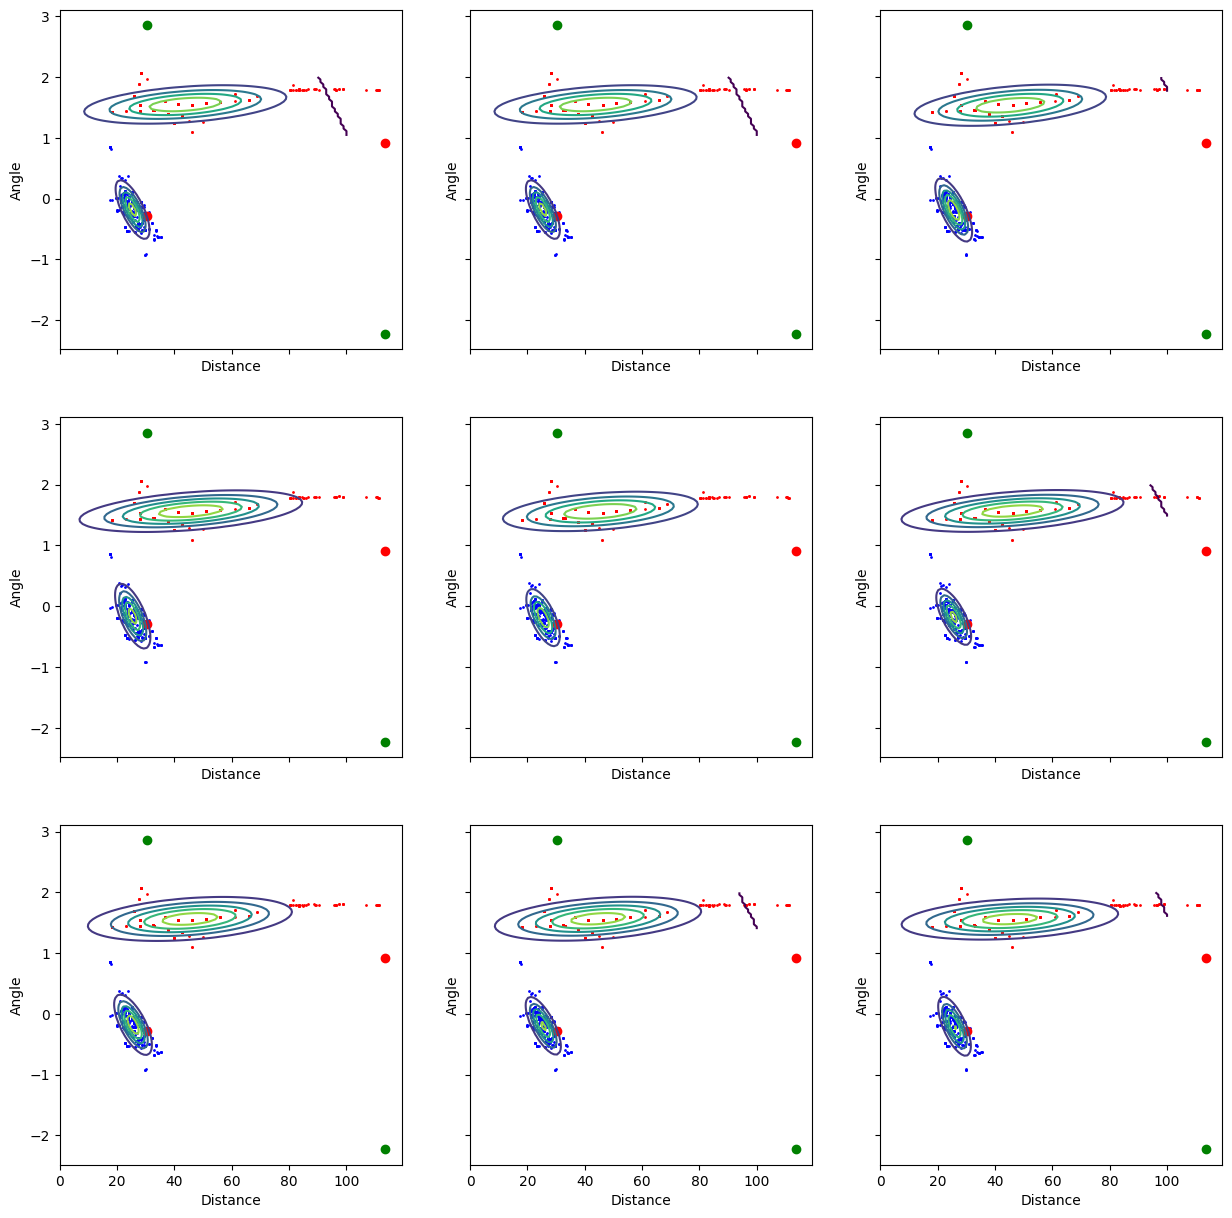

In [35]:
# Create a grid of points
distance = np.linspace(0, 100, 100)
angle = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(distance, angle)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# Sample points from the multivariate normal parametrized by the draws

zs = []
# Plot the contours
fig, ax = plt.subplots(3,3, figsize=(15, 15), sharex=True, sharey=True)
for ax1 in ax.flatten():
    i = np.random.choice(range(1000))
    Z = multivariate_normal.pdf(pos, mean=p1_mean[i], cov=p1_covariance[i])
    ax1.contour(X, Y, Z, 5)
    Z = multivariate_normal.pdf(pos, mean=p2_mean[i], cov=p2_covariance[i])
    ax1.contour(X, Y, Z, 5)
    ax1.set_xlabel('Distance')
    ax1.set_ylabel('Angle')


    # Plot the points
    ax1.scatter(p1_points['Distance'], p1_points['Angle'], c='b', label='P1', s=1)
    ax1.scatter(p2_points['Distance'], p2_points['Angle'], c='r', label='P2', s=1)
    ax1.scatter(P1_dist_angle[0], P1_dist_angle[1], c='r', label='P1 (true)')
    ax1.scatter(P2_dist_angle[0], P2_dist_angle[1], c='r', label='P2 (true)')


In [39]:
lrs = []
for i in range(1000):
    e_given_p1 = multivariate_normal.pdf(E_p1, mean=p1_mean[i], cov=p1_covariance[i])
    e_given_p2 = multivariate_normal.pdf(E_p2, mean=p2_mean[i], cov=p2_covariance[i])
    lr = e_given_p1 / e_given_p2
    lrs.append(lr)

print('Mean LR:', np.mean(lrs), 'Std LR:', np.std(lrs))



Mean LR: 1.0097288166622763e+86 Std LR: 3.1914445147791967e+87


In [33]:
# compute a bunch of likelihood ratios and their confidence intervals

ratios = []
for i in range(len(p1_mean)):
    ratios.append(multivariate_normal.pdf(P1_dist_angle, mean=p1_mean[i], cov=p1_covariance[i]) /
                  multivariate_normal.pdf(P2_dist_angle, mean=p2_mean[i], cov=p2_covariance[i]))

print(f"Ratios: {round(np.mean(ratios)):,d} +/- {round(np.std(ratios)):,d}")



Ratios: 342,343,978 +/- 1,139,261,466
